In [170]:
import os
import re
import requests
import pickle
from pathlib import Path
import zipfile
from PIL import Image
import numpy as np
import bz2
import matplotlib.pyplot as plt

# Directory where files are stored. Will be used each time we need to load a file
file_directory = os.path.join(os.getcwd(), 'files')
data_folder = Path(file_directory)

# [Warmup](http://www.pythonchallenge.com/pc/def/0.html)
As shown on the picture, goal here is to compute 2^38. Easy peasy.

In [3]:
print(pow(2, 38))

274877906944


# [Step 01](http://www.pythonchallenge.com/pc/def/map.html)
Letters are moved from 2 positions. I will use the ```ord``` function to get the ascii code and can then navigate and adapt.

In [4]:
str = "g fmnc wms bgblr rpylqjyrc gr zw fylb. rfyrq ufyr amknsrcpq ypc dmp. bmgle gr gl zw fylb gq glcddgagclr " \
            "ylb rfyr'q ufw rfgq rcvr gq qm jmle. sqgle qrpgle.kyicrpylq() gq pcamkkclbcb. lmu ynnjw ml rfc spj."
url = 'map'
output = ''

for character in str:
    ascii_code = ord(character)
    if ord('a') <= ascii_code <= ord('z'):
        if (ascii_code + 2) > ord('z'):
            output += chr(ord('a') - 1 + (ascii_code + 2) - ord('z'))
        else:
            output += chr(ascii_code + 2)
    else:
        output += character
print(output)

i hope you didnt translate it by hand. thats what computers are for. doing it in by hand is inefficient and that's why this text is so long. using string.maketrans() is recommended. now apply on the url.


# [Step 02](http://www.pythonchallenge.com/pc/def/ocr.html)
Elements of the riddle found in the sourcecode of the page have been copied to ```step02.txt``` file.  
Here we need to find *rare* characters. My approach was to find all letters, no matter the case. It worked but did not really respect the riddle idea. I should have watched the number of occurrences because if there were also letters (but a few), this regexp would have found them as well.

In [6]:
# Assuming the kernel is running in this project directory (otherwise, adapt the line below)
file_to_load = os.path.join(file_directory, 'step02.txt')
content = ''
if os.path.exists(file_to_load):
    with open(file_to_load, 'rt') as f:
        content = f.read()
matches = re.findall('([a-zA-Z]+)', content)
for i in matches:
    print(i, end="")

equality

# [Step 03](http://www.pythonchallenge.com/pc/def/equality.html)
Elements of the riddle found in the sourcecode of the page have been copied to ```step03.txt``` file.  
Here we need to find in the text all small letters which are surrounded by EXACTLY 3 uppercase letters (before and after and exactly 3, no more).  
*Note: this code does not work if there are special characters in the content. Better way: `[^A-Z]` instead of [a-z]*

In [7]:
# Assuming the kernel is running in this project directory (otherwise, adapt the line below)
file_to_load = os.path.join(file_directory, 'step03.txt')
content = ''
if os.path.exists(file_to_load):
    with open(file_to_load, 'rt') as f:
        content = f.read()
matches = re.findall('[a-z][A-Z]{3}([a-z])[A-Z]{3}[a-z]', content)
for a_match in matches:
    print(a_match, end="")


linkedlist

# [Step 04](http://www.pythonchallenge.com/pc/def/linkedlist.html)
Using requests to go to a new url each time we find a new number in the response content. Once the regexp does not match anymore it means we have solved the riddle. Next.

In [71]:
def read_from_source(url, file, addon_num):
    if url:
        url = 'http://www.pythonchallenge.com/pc/def/linkedlist.php?nothing='
        r = requests.get(url + addon_num)
        content = r.text
    elif file:
        file_name = addon_num + '.txt'
        file_to_open = data_folder / "channel" / file_name
        content = file_to_open.read_text()
    return content

def read_until_found(url, file, addon_num, display_counter_value):
    found = False
    counter = 0
    comments = []
    channel_zip_file = zipfile.ZipFile(data_folder / "channel" / "channel.zip")
    
    while not found:
        content = read_from_source(url, file, addon_num)
        if content.find('ext nothing is') < 0:
            found = True
            print('No more next nothing, found this text instead: "{}" for addon_num={}'.format(content, addon_num))
            print('Comments collected are:\n{}'.format(''.join(comments)))
        else:
            addon_num = "".join(re.findall('.*ext nothing is ([0-9]+)', content))
            # Handle the specific case of Step 06
            if file:
                comments.append(channel_zip_file.getinfo(addon_num + '.txt').comment.decode("utf-8"))
        counter += 1
        if counter % display_counter_value == 0:
            print("{}: {}".format(counter, content))

In [28]:
#addon_num = '12345'
addon_num = '8022'
read_until_found(True, False, addon_num, 25)

25: and the next nothing is 64994
50: and the next nothing is 75494
75: and the next nothing is 76841
100: and the next nothing is 87890
125: and the next nothing is 73950
150: and the next nothing is 31785
No more next nothing, found this text instead: "peak.html" for addon_num=66831


# [Step 05](http://www.pythonchallenge.com/pc/def/peak.html)
Looking at the page codesource, we can see that there is an element with banner.p as source. The content has been copied into ```step05.p```file.  
A quick search on the internet and it seems that `p` is the extension for files saved with pickle module (ohhh ok...peak hell, pickle...ok...).  
Loaded the file with pickle and saw a list of tuples with either a space character either a dash, always followed by a number.   
Tried to check if there was any chance it would mean: number of occurrences of spaces/dashes to draw on each line.  
It worked. Next !

In [10]:
file_to_load = os.path.join(file_directory, 'step05.p')
content = pickle.loads(open(file_to_load, "rb").read())
for lines in content:
    line = [character * nb_occ for character, nb_occ in lines]
    print("".join(line))


UnpicklingError: the STRING opcode argument must be quoted

# [Step 06](http://www.pythonchallenge.com/pc/def/channel.html)
Replace `.html` by `.zip` in the riddle URL (pc/def/channel.html).  
Download the zip and unzip it under `files/channel` directory.  
Open the `readme.txt` file and follow instructions.

In [72]:
addon_num = '90052'
read_until_found(False, True, addon_num, 50)

50: Next nothing is 37695
100: Next nothing is 56617
150: Next nothing is 78862
200: Next nothing is 30395
250: Next nothing is 1063
300: Next nothing is 41894
350: Next nothing is 2539
400: Next nothing is 49856
450: Next nothing is 83168
500: Next nothing is 81455
550: Next nothing is 55621
600: Next nothing is 89357
650: Next nothing is 19812
700: Next nothing is 72946
750: Next nothing is 1228
800: Next nothing is 24027
850: Next nothing is 72452
900: Next nothing is 15667
No more next nothing, found this text instead: "Collect the comments." for addon_num=46145
Comments collected are:
***************************************************************
****************************************************************
**                                                            **
**   OO    OO    XX      YYYY    GG    GG  EEEEEE NN      NN  **
**   OO    OO  XXXXXX   YYYYYY   GG   GG   EEEEEE  NN    NN   **
**   OO    OO XXX  XXX YYY   YY  GG GG     EE       NN  NN    **
**   OOOOOOOO 

It seems that it is possible to add some comments in file when zipping them. Goal here is to read each one and concatenate them in the same reading order for the linked list. The method has been updated to do that and append comments in a list that is displayed in the end.  
So the next riddle will be `hockey.html`.  
Nothing, just a sentence: "it's in the air. look at the letters".  
OK, having back a look at the previous word, we can see that it is built with O, X, Y, G, E and N: oxygen (it's in the air). 

# [Step 07](http://www.pythonchallenge.com/pc/def/oxygen.html)
Greyscale pixels are at: 42px to 51px height and 608px width

In [104]:
file_to_load = os.path.join(file_directory, 'oxygen.png')
im = Image.open(file_to_load)
# Grey picture is more or less from y = 42px to 51px over width =~ 608
row = [im.getpixel((x, 44))[0] for x in range(608)]
print(row)
print()

# Let's imagine that the value of the pixel is a character...
counter = 0
string = ''
for r in row:
    if counter % 7 == 0: # There is a repetition: each value is put 7 times
        string += chr(r)
    counter += 1


print(string)

[115, 115, 115, 115, 115, 109, 109, 109, 109, 109, 109, 109, 97, 97, 97, 97, 97, 97, 97, 114, 114, 114, 114, 114, 114, 114, 116, 116, 116, 116, 116, 116, 116, 32, 32, 32, 32, 32, 32, 32, 103, 103, 103, 103, 103, 103, 103, 117, 117, 117, 117, 117, 117, 117, 121, 121, 121, 121, 121, 121, 121, 44, 44, 44, 44, 44, 44, 44, 32, 32, 32, 32, 32, 32, 32, 121, 121, 121, 121, 121, 121, 121, 111, 111, 111, 111, 111, 111, 111, 117, 117, 117, 117, 117, 117, 117, 32, 32, 32, 32, 32, 32, 32, 109, 109, 109, 109, 109, 109, 109, 97, 97, 97, 97, 97, 97, 97, 100, 100, 100, 100, 100, 100, 100, 101, 101, 101, 101, 101, 101, 101, 32, 32, 32, 32, 32, 32, 32, 105, 105, 105, 105, 105, 105, 105, 116, 116, 116, 116, 116, 116, 116, 46, 46, 46, 46, 46, 46, 46, 32, 32, 32, 32, 32, 32, 32, 116, 116, 116, 116, 116, 116, 116, 104, 104, 104, 104, 104, 104, 104, 101, 101, 101, 101, 101, 101, 101, 32, 32, 32, 32, 32, 32, 32, 110, 110, 110, 110, 110, 110, 110, 101, 101, 101, 101, 101, 101, 101, 120, 120, 120, 120, 120, 120,

In [103]:
print(''.join(chr(x) for x in [105, 110, 116, 101, 103, 114, 105, 116, 121]))

integrity


# [Step 08](http://www.pythonchallenge.com/pc/def/integrity.html)
When clicking on the bee, it tries to open a link which is protected with Basic Authentication and it says also 'http://www.pythonchallenge.com is requesting your username and password. The site says: “inflate”'.  
In source code, there are comments with what I guess are login and passwords encoded one way or another. Let's try to decrypt. 

In [160]:
un = b'BZh91AY&SYA\xaf\x82\r\x00\x00\x01\x01\x80\x02\xc0\x02\x00 \x00!\x9ah3M\x07<]\xc9\x14\xe1BA\x06\xbe\x084'
pw = b'BZh91AY&SY\x94$|\x0e\x00\x00\x00\x81\x00\x03$ \x00!\x9ah3M\x13<]\xc9\x14\xe1BBP\x91\xf08'

# Encoded 'un' & 'pw' stands for username and password which are compressed in BZip2 format (BZ at beginning + h for version 2)
print(bz2.decompress(un))
print(bz2.decompress(pw))

b'huge'
b'file'


# [Step 09](http://www.pythonchallenge.com/pc/return/good.html)
first+second=?

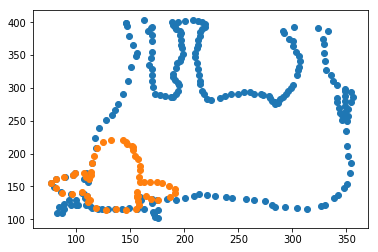

In [175]:
first = [146,399,163,403,170,393,169,391,166,386,170,381,170,371,170,355,169,346,167,335,170,329,170,320,170,
310,171,301,173,290,178,289,182,287,188,286,190,286,192,291,194,296,195,305,194,307,191,312,190,316,
190,321,192,331,193,338,196,341,197,346,199,352,198,360,197,366,197,373,196,380,197,383,196,387,192,
389,191,392,190,396,189,400,194,401,201,402,208,403,213,402,216,401,219,397,219,393,216,390,215,385,
215,379,213,373,213,365,212,360,210,353,210,347,212,338,213,329,214,319,215,311,215,306,216,296,218,
290,221,283,225,282,233,284,238,287,243,290,250,291,255,294,261,293,265,291,271,291,273,289,278,287,
279,285,281,280,284,278,284,276,287,277,289,283,291,286,294,291,296,295,299,300,301,304,304,320,305,
327,306,332,307,341,306,349,303,354,301,364,301,371,297,375,292,384,291,386,302,393,324,391,333,387,
328,375,329,367,329,353,330,341,331,328,336,319,338,310,341,304,341,285,341,278,343,269,344,262,346,
259,346,251,349,259,349,264,349,273,349,280,349,288,349,295,349,298,354,293,356,286,354,279,352,268,
352,257,351,249,350,234,351,211,352,197,354,185,353,171,351,154,348,147,342,137,339,132,330,122,327,
120,314,116,304,117,293,118,284,118,281,122,275,128,265,129,257,131,244,133,239,134,228,136,221,137,
214,138,209,135,201,132,192,130,184,131,175,129,170,131,159,134,157,134,160,130,170,125,176,114,176,
102,173,103,172,108,171,111,163,115,156,116,149,117,142,116,136,115,129,115,124,115,120,115,115,117,
113,120,109,122,102,122,100,121,95,121,89,115,87,110,82,109,84,118,89,123,93,129,100,130,108,132,110,
133,110,136,107,138,105,140,95,138,86,141,79,149,77,155,81,162,90,165,97,167,99,171,109,171,107,161,
111,156,113,170,115,185,118,208,117,223,121,239,128,251,133,259,136,266,139,276,143,290,148,310,151,
332,155,348,156,353,153,366,149,379,147,394,146,399]

second = [156,141,165,135,169,131,176,130,187,134,191,140,191,146,186,150,179,155,175,157,168,157,163,157,159,
157,158,164,159,175,159,181,157,191,154,197,153,205,153,210,152,212,147,215,146,218,143,220,132,220,
125,217,119,209,116,196,115,185,114,172,114,167,112,161,109,165,107,170,99,171,97,167,89,164,81,162,
77,155,81,148,87,140,96,138,105,141,110,136,111,126,113,129,118,117,128,114,137,115,146,114,155,115,
158,121,157,128,156,134,157,136,156,136]

# I guess those are some coordinates. HTML title says 'connect the dots'
# Build a function that will transform the table into 2-elements tuple list (x, Y) then plots the result with matplotlib
def transform_to_tuples(l):
    as_tuples = []
    i = 0
    while i < len(l) - 1:
        t = (l[i], l[i + 1])
        as_tuples.append(t)
        i = i + 2
    return as_tuples

first_as_tuples = transform_to_tuples(first)
second_as_tuples = transform_to_tuples(second)

plt.scatter(*zip(*first_as_tuples))
plt.scatter(*zip(*second_as_tuples))

==> trying 'http://www.pythonchallenge.com/pc/return/cow.html' and it says 'hmm. it's a male.' ==> http://www.pythonchallenge.com/pc/return/bull.html

# [Step 10](http://www.pythonchallenge.com/pc/return/bull.html)
There is a link to a .txt file which contains 'a = 1, 11, 21, 1211, 111221, ' + the riddle says "len(a[30]) = ?"

==> The riddle is "how many characters when we'll arrive to 30 elements" ? The sequence is:
* 1
* One '1'
* Two '1'
* One '2', One '1'
and so on

In [180]:
s = '1'
total_count = 0
a = []
a.append(s)

while total_count < 31:
    new_s = ''
    s_tmp = a[total_count]
    previous_char = s_tmp[0]
    inner_count = 0
    for char in s_tmp:
        if char == previous_char:
            inner_count += 1
        else:
            new_s += str(inner_count) + previous_char
            inner_count = 1
            previous_char = char

    new_s += str(inner_count) + previous_char

    a.append(new_s)
    total_count += 1

print(len(a[30]))

5808
